In [1]:
import pandas as pd
import numpy as np

# data visualization library 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.figsize'] =[10,8]
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['font.family'] = 'sans-serif'

In [2]:
coviddata = pd.read_csv('C:\\Users\\Marium Malik\Desktop\\RE Paper covid 19 confirm vs death prediction\\CORONAVIRUS detection using symptoms\\dataset.csv')
coviddata.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,21/01/2021,0,0,0,0,0,Positive,No,female,Contact with confirmed
1,21/01/2021,0,0,0,0,0,Negative,Yes,male,Other
2,21/01/2021,0,0,0,0,0,Negative,Yes,female,Other
3,21/01/2021,0,0,0,0,0,Negative,No,female,Other
4,21/01/2021,0,0,0,0,0,Negative,No,male,Other


In [3]:
coviddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   test_date            1048575 non-null  object
 1   cough                1048575 non-null  int64 
 2   fever                1048575 non-null  int64 
 3   sore_throat          1048575 non-null  int64 
 4   shortness_of_breath  1048575 non-null  int64 
 5   head_ache            1048575 non-null  int64 
 6   corona_result        1048575 non-null  object
 7   age_60_and_above     1018127 non-null  object
 8   gender               1044823 non-null  object
 9   test_indication      1048575 non-null  object
dtypes: int64(5), object(5)
memory usage: 80.0+ MB


In [4]:
coviddata.describe(include='all')

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575,1018127,1044823,1048575
unique,38,NaN,NaN,NaN,NaN,NaN,3,2,2,3
top,04/01/2021,NaN,NaN,NaN,NaN,NaN,Negative,No,female,Other
freq,38854,NaN,NaN,NaN,NaN,NaN,930982,905360,526726,988353
mean,NaN,2.858451e-02,1.925566e-02,1.128293e-02,2.459528e-03,2.549269e-02,NaN,NaN,NaN,NaN
std,NaN,1.666357e-01,1.374223e-01,1.056203e-01,4.953263e-02,1.576161e-01,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
75%,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


In [5]:
coviddata.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [6]:
coviddata

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,21/01/2021,0,0,0,0,0,Positive,No,female,Contact with confirmed
1,21/01/2021,0,0,0,0,0,Negative,Yes,male,Other
2,21/01/2021,0,0,0,0,0,Negative,Yes,female,Other
3,21/01/2021,0,0,0,0,0,Negative,No,female,Other
4,21/01/2021,0,0,0,0,0,Negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
1048570,15/12/2020,0,0,0,0,0,Negative,Yes,male,Other
1048571,15/12/2020,0,0,0,0,0,Negative,No,male,Other
1048572,15/12/2020,0,0,0,0,0,Negative,No,female,Other
1048573,15/12/2020,0,0,0,0,0,Negative,No,female,Other


In [7]:
#find missing values
coviddata.isnull().sum()

test_date                  0
cough                      0
fever                      0
sore_throat                0
shortness_of_breath        0
head_ache                  0
corona_result              0
age_60_and_above       30448
gender                  3752
test_indication            0
dtype: int64

In [8]:
#Delete row with dummy value
covid = coviddata.dropna(how='any',axis=0)
covid

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,21/01/2021,0,0,0,0,0,Positive,No,female,Contact with confirmed
1,21/01/2021,0,0,0,0,0,Negative,Yes,male,Other
2,21/01/2021,0,0,0,0,0,Negative,Yes,female,Other
3,21/01/2021,0,0,0,0,0,Negative,No,female,Other
4,21/01/2021,0,0,0,0,0,Negative,No,male,Other
...,...,...,...,...,...,...,...,...,...,...
1048570,15/12/2020,0,0,0,0,0,Negative,Yes,male,Other
1048571,15/12/2020,0,0,0,0,0,Negative,No,male,Other
1048572,15/12/2020,0,0,0,0,0,Negative,No,female,Other
1048573,15/12/2020,0,0,0,0,0,Negative,No,female,Other


In [9]:
#check missing values successfully dropped
#find missing values
covid.isnull().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

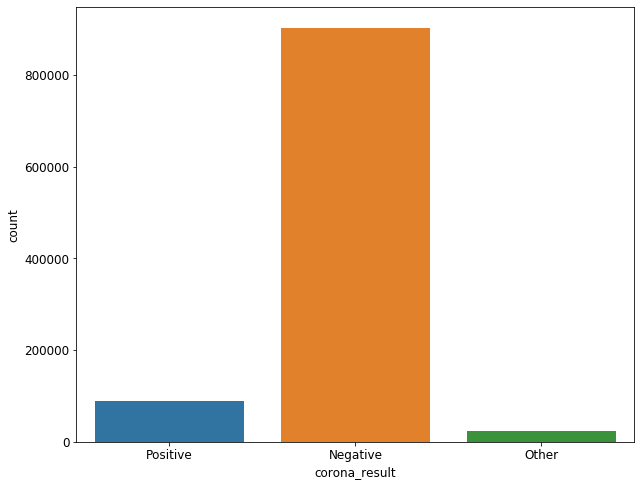

In [10]:
#we have successfully removed all null values, now our data is clean
#now we will vizualize the data 
sns.countplot(x='corona_result',data=covid)

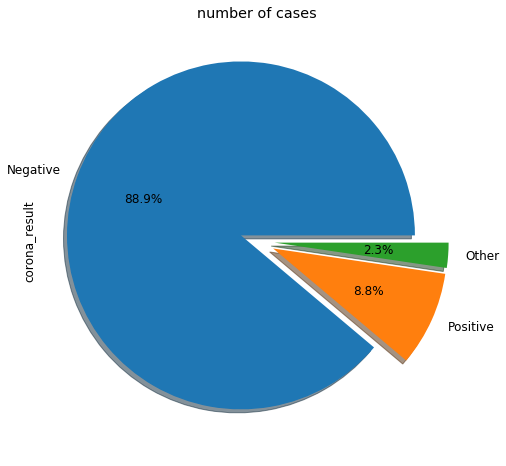

In [11]:
#pie chart vizualisation of covid 19
covid["corona_result"].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

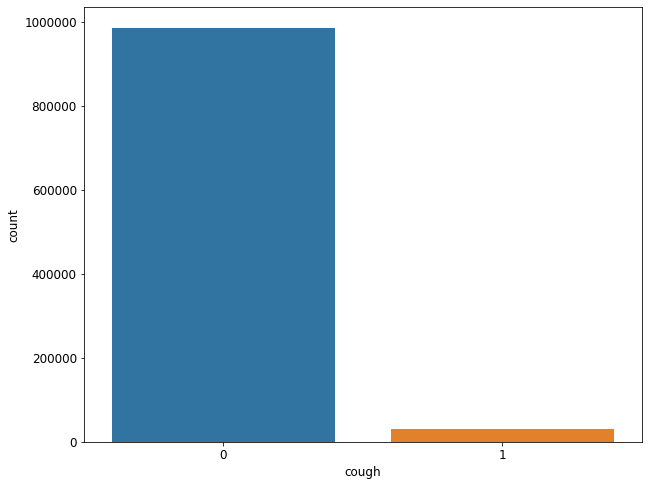

In [12]:
#COUGH
sns.countplot(x='cough',data=covid)

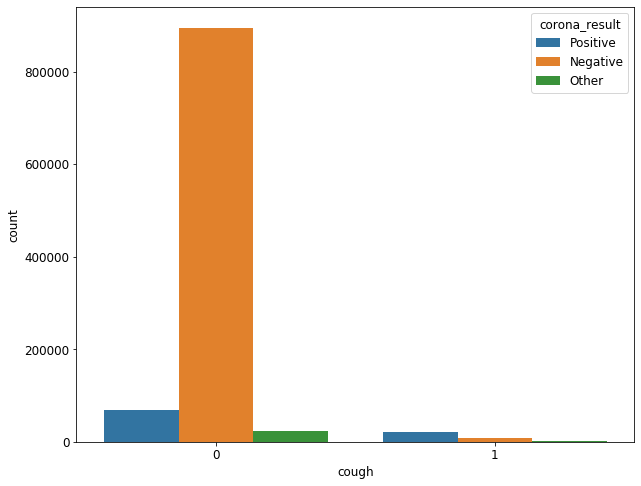

In [13]:
#cough and corona positive
sns.countplot(x='cough',hue='corona_result',data=covid)

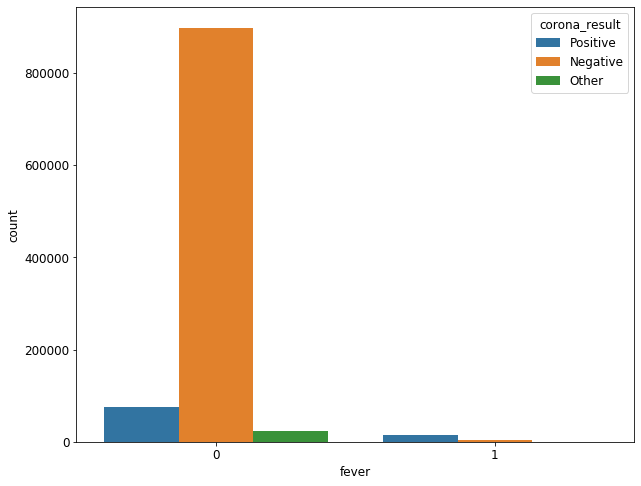

In [14]:
#fever
sns.countplot(x='fever',hue='corona_result',data=covid);

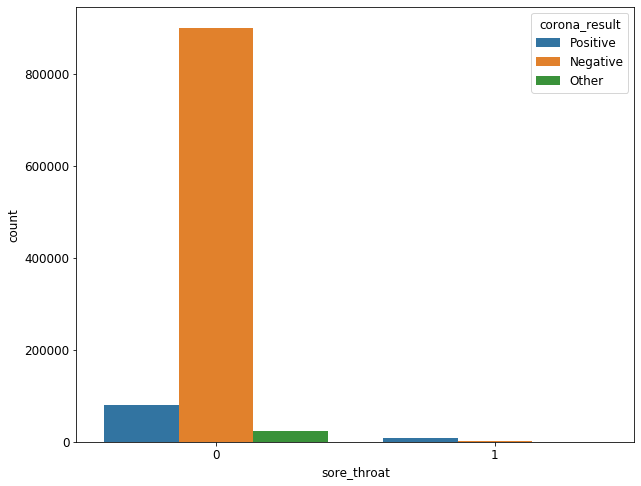

In [15]:
#sore_throat and corona
sns.countplot(x='sore_throat',hue='corona_result',data=covid)

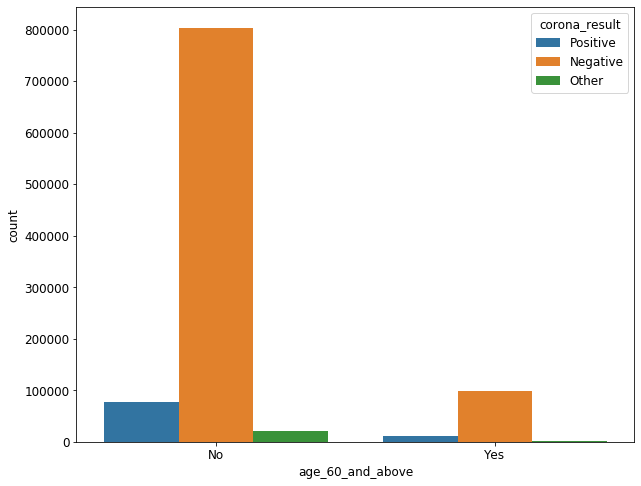

In [16]:
#age above 60 and corona
sns.countplot(x='age_60_and_above',hue='corona_result',data=covid)

In [17]:
#feature transformation
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()

In [18]:
#sore_throat	shortness_of_breath	head_ache	corona_result	age_60_and_above	gender	
covid['cough']=e.fit_transform(covid['cough'])
covid['fever']=e.fit_transform(covid['fever'])
covid['sore_throat']=e.fit_transform(covid['sore_throat'])
covid['shortness_of_breath']=e.fit_transform(covid['shortness_of_breath'])
covid['head_ache']=e.fit_transform(covid['head_ache'])
covid['age_60_and_above']=e.fit_transform(covid['age_60_and_above'])
covid['gender']=e.fit_transform(covid['gender'])

C:\Users\Marium Malik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Marium Malik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Marium Malik\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [19]:
covid

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,21/01/2021,0,0,0,0,0,Positive,0,0,Contact with confirmed
1,21/01/2021,0,0,0,0,0,Negative,1,1,Other
2,21/01/2021,0,0,0,0,0,Negative,1,0,Other
3,21/01/2021,0,0,0,0,0,Negative,0,0,Other
4,21/01/2021,0,0,0,0,0,Negative,0,1,Other
...,...,...,...,...,...,...,...,...,...,...
1048570,15/12/2020,0,0,0,0,0,Negative,1,1,Other
1048571,15/12/2020,0,0,0,0,0,Negative,0,1,Other
1048572,15/12/2020,0,0,0,0,0,Negative,0,0,Other
1048573,15/12/2020,0,0,0,0,0,Negative,0,0,Other


In [20]:
# drop test_indication colum and drop the valus in corona_result where the result outcome is other, so tat we have only corona positive or negative result in the data
covid=covid.drop(['test_indication'], axis=1)
#drop test date column as we dont need it too
covid=covid.drop(['test_date'], axis=1)

In [21]:
covid

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,Positive,0,0
1,0,0,0,0,0,Negative,1,1
2,0,0,0,0,0,Negative,1,0
3,0,0,0,0,0,Negative,0,0
4,0,0,0,0,0,Negative,0,1
...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,Negative,1,1
1048571,0,0,0,0,0,Negative,0,1
1048572,0,0,0,0,0,Negative,0,0
1048573,0,0,0,0,0,Negative,0,0


In [22]:
#covid=covid.drop(covid.corona_result[covid['corona_result'] == 'Other'], inplace = True)
#indexNames = covid[covid['corona_result'] == 'Other'].index
#covidnew = covid.drop(indexNames , inplace=True)
covidnew=covid[covid.corona_result != 'Other']

In [23]:
covid

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,Positive,0,0
1,0,0,0,0,0,Negative,1,1
2,0,0,0,0,0,Negative,1,0
3,0,0,0,0,0,Negative,0,0
4,0,0,0,0,0,Negative,0,1
...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,Negative,1,1
1048571,0,0,0,0,0,Negative,0,1
1048572,0,0,0,0,0,Negative,0,0
1048573,0,0,0,0,0,Negative,0,0


In [24]:
covidnew

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,Positive,0,0
1,0,0,0,0,0,Negative,1,1
2,0,0,0,0,0,Negative,1,0
3,0,0,0,0,0,Negative,0,0
4,0,0,0,0,0,Negative,0,1
...,...,...,...,...,...,...,...,...
1048570,0,0,0,0,0,Negative,1,1
1048571,0,0,0,0,0,Negative,0,1
1048572,0,0,0,0,0,Negative,0,0
1048573,0,0,0,0,0,Negative,0,0


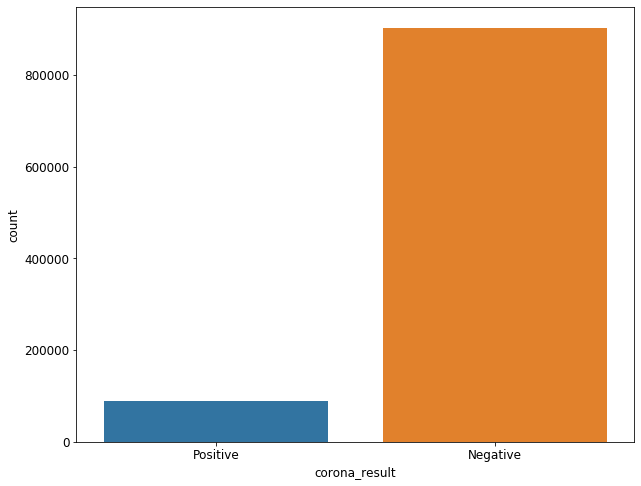

In [25]:
# we have removed rows where corona_result is Other
#now we will vizualize the data 
sns.countplot(x='corona_result',data=covidnew)

In [26]:
#store covidnew in covid again (for our ease)
covid = covidnew

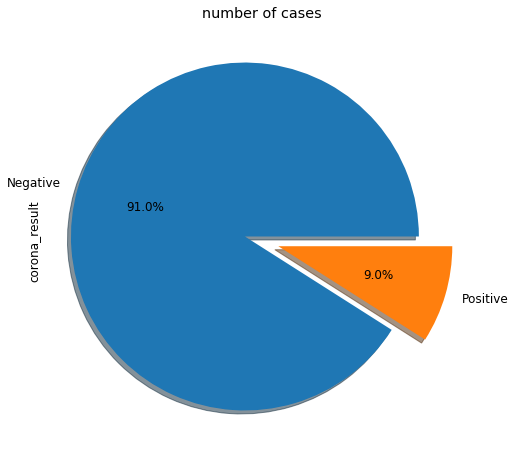

In [27]:
#visualize the corona result in pie chart

covid["corona_result"].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True)
plt.title('number of cases');

In [28]:
covid.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,Positive,0,0
1,0,0,0,0,0,Negative,1,1
2,0,0,0,0,0,Negative,1,0
3,0,0,0,0,0,Negative,0,0
4,0,0,0,0,0,Negative,0,1


In [29]:
#now we transform the column corona_result to 0 and 1 i.e we transfer the values to int
covid['corona_result']=e.fit_transform(covid['corona_result'])

C:\Users\Marium Malik\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
#now check the data types of all the variables in our data frame
covid.dtypes.value_counts()

int64    5
int32    3
dtype: int64

In [31]:
covid.dtypes

cough                  int64
fever                  int64
sore_throat            int64
shortness_of_breath    int64
head_ache              int64
corona_result          int32
age_60_and_above       int32
gender                 int32
dtype: object

In [32]:
#info of our data aafter transformation
covid.describe(include='all')

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
count,992170.000000,992170.000000,992170.000000,992170.000000,992170.000000,992170.000000,992170.000000,992170.000000
mean,0.029133,0.019632,0.011555,0.002482,0.026025,0.090182,0.111259,0.494231
std,0.168180,0.138731,0.106874,0.049762,0.159209,0.286443,0.314453,0.499967
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


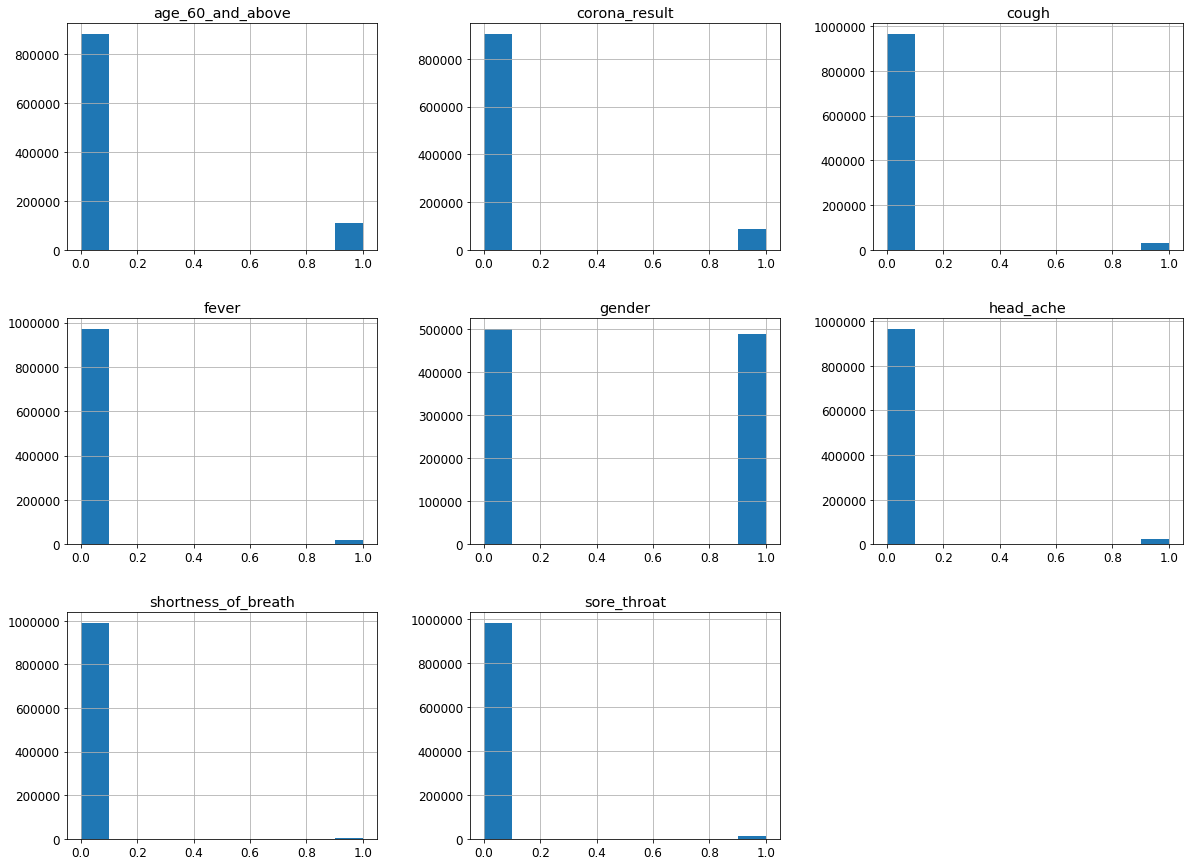

In [33]:
covid.hist(figsize=(20,15));

In [34]:
#correlation between features
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
cough,1.000000,0.333990,0.286263,0.163937,0.350175,0.384887,0.024663,-0.018468
fever,0.333990,1.000000,0.198695,0.111927,0.291549,0.323162,0.013767,0.001967
sore_throat,0.286263,0.198695,1.000000,0.122719,0.316232,0.255587,-0.001937,-0.025094
shortness_of_breath,0.163937,0.111927,0.122719,1.000000,0.142980,0.123733,0.012751,-0.011436
head_ache,0.350175,0.291549,0.316232,0.142980,1.000000,0.387503,-0.009539,-0.027749
corona_result,0.384887,0.323162,0.255587,0.123733,0.387503,1.000000,0.018989,-0.005319
age_60_and_above,0.024663,0.013767,-0.001937,0.012751,-0.009539,0.018989,1.000000,-0.006431
gender,-0.018468,0.001967,-0.025094,-0.011436,-0.027749,-0.005319,-0.006431,1.000000


In [35]:
#feature selection
#we are going to delete features with low correlation: shortness_of_breath, age_60_and_above,and gender
covid=covid.drop('shortness_of_breath',axis=1)
covid=covid.drop('age_60_and_above',axis=1)
covid=covid.drop('gender',axis=1)

In [36]:
#lets check the correlation of remaining feaatures
corr=covid.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,cough,fever,sore_throat,head_ache,corona_result
cough,1.000000,0.333990,0.286263,0.350175,0.384887
fever,0.333990,1.000000,0.198695,0.291549,0.323162
sore_throat,0.286263,0.198695,1.000000,0.316232,0.255587
head_ache,0.350175,0.291549,0.316232,1.000000,0.387503
corona_result,0.384887,0.323162,0.255587,0.387503,1.000000
